<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/VLCmulti_levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#data = pd.read_excel('data_5.xlsx')
data = pd.read_csv('data_5.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524288 entries, 0 to 524287
Data columns (total 2 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Samples - Analog Ch AIN3A      524288 non-null  int64  
 1   Voltage (V) - Analog Ch AIN3A  524288 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.0 MB


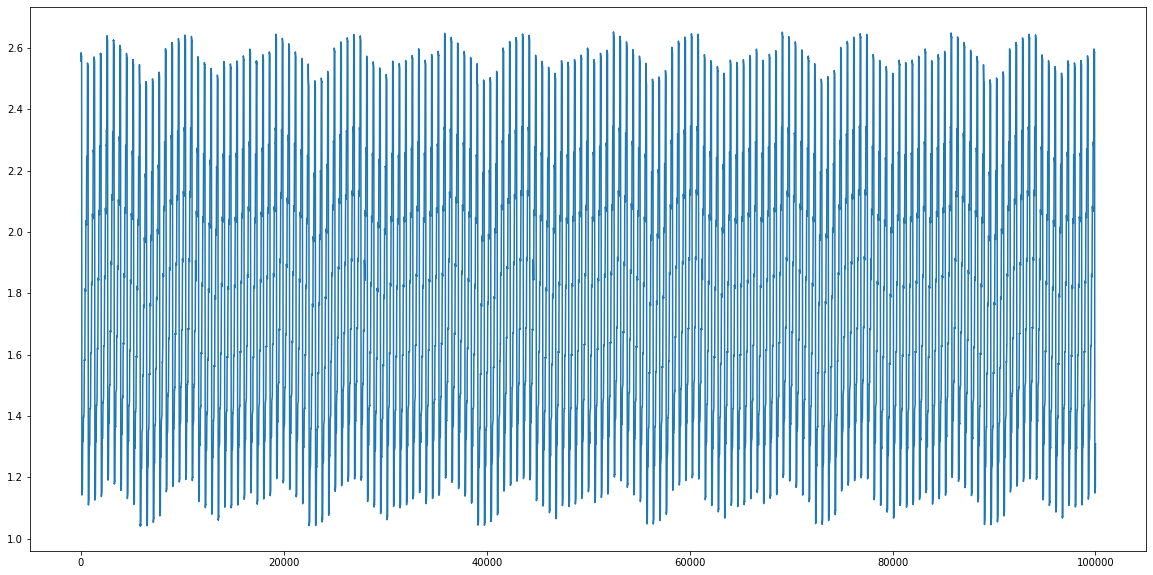

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(data['Voltage (V) - Analog Ch AIN3A'][0:100000])

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
volt_df=pd.DataFrame(data,
            columns=['Voltage (V) - Analog Ch AIN3A'])
#volt_df = data['Voltage (V) - Analog Ch AIN3A']
volt_norm = scaler.fit_transform(np.array(volt_df).reshape(-1,1))

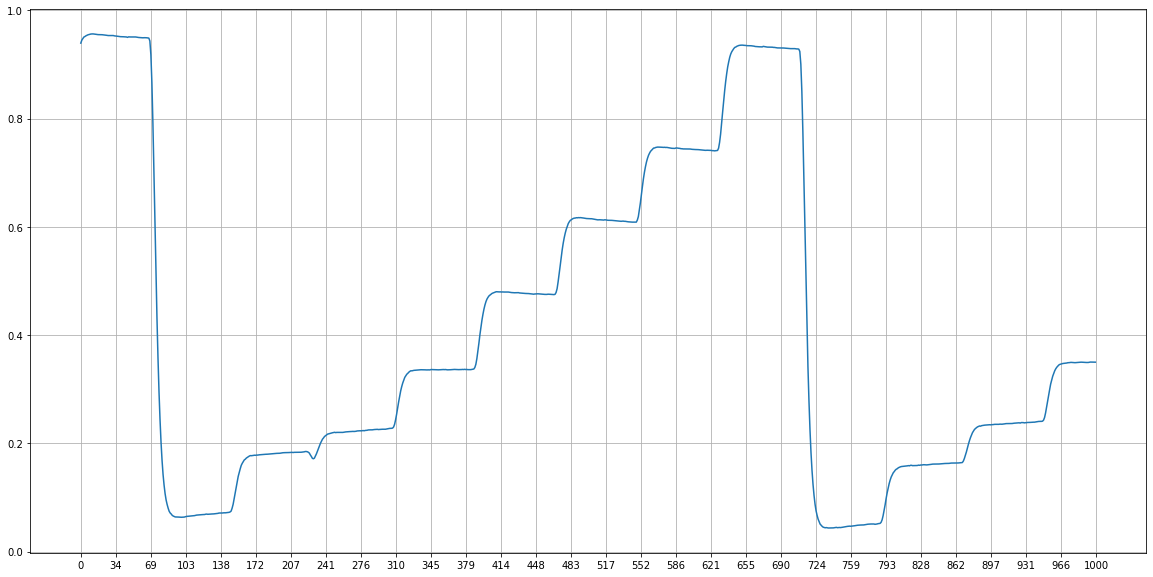

In [5]:
plt.figure(figsize=(20,10))
L1, L2 = 0, 1000
plt.plot(volt_norm[L1:L2])
plt.xticks( np.linspace(0, L2-L1, 30) )
plt.grid()

(array([61486., 62059., 57933., 98859., 60318., 62234., 59757., 61642.]),
 array([0.   , 0.12 , 0.205, 0.28 , 0.485, 0.61 , 0.725, 0.875, 1.   ]),
 <a list of 8 Patch objects>)

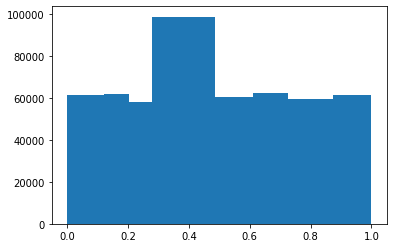

In [6]:
plt.hist(volt_norm, bins=[0. , 0.12, 0.205 , 0.28, 0.485  , 0.61, 0.725 , 0.875, 1.])

(array([65105., 99164., 76617., 56419., 57419., 62086., 45836., 61642.]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 <a list of 8 Patch objects>)

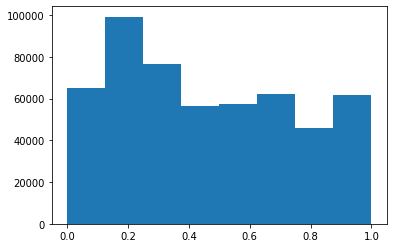

In [7]:
plt.hist(volt_norm, bins=8)

FFT analysis

In [8]:
from scipy.fftpack import fft, ifft, fftshift
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft

plt.style.use('seaborn-poster')
%matplotlib inline

# fs=1e6
# len=10240     
# NFFT=1024 #NFFT-point DFT      
# x = volt_norm[0:len]
# #X=fft(x,NFFT) #compute DFT using FFT    

# # fig1, ax = plt.subplots(nrows=1, ncols=1) #create figure handle
# # nVals = np.arange(start = 0,stop = NFFT) # raw index for FFT plot
# # ax.plot(nVals,np.abs(X))      
# # ax.set_title('Double Sided FFT - without FFTShift')
# # ax.set_xlabel('Sample points (N-point DFT)')        
# # ax.set_ylabel('DFT Values')
# # fig1.show()
# # Moisture_mean_x = pd.read_excel("signal.xlsx", header = None)
# # Moisture_mean_x = pd.rolling_mean(Moisture_mean_x, 10) # doesn't helps
# # Moisture_mean_x = Moisture_mean_x.dropna()
# # Moisture_mean_x = Moisture_mean_x -Moisture_mean_x.mean()
# frate = fs #/sec           
# Hn = fft.fft(x)

# freqs = fft.fftfreq(len(Hn), 1/frate)
# idx = np.argmax(np.abs(Hn))
# freq_in_hertz = freqs[idx]

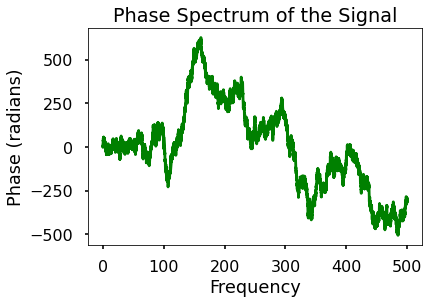

In [9]:
import numpy
from matplotlib import pyplot 
   
# assigning time values of the signal
# initial time period, final time period and phase angle
#signalTime = numpy.arange(5, 10, 0.25);
  
# getting the amplitude of the signal
#signalAmplitude = numpy.sin(signalTime)
  
Fs = 1
  
x = volt_norm[0:100000].reshape(-1,)
# plotting the phase spectrum of the signal 
pyplot.phase_spectrum(x, Fs=1e3,  color ='green')
  
pyplot.title("Phase Spectrum of the Signal")
pyplot.show()

### Frequency Analysis

In [19]:
from scipy import pi
from scipy.fftpack import fft, fftfreq



#sample_rate = 1e6
sample_rate = 2**16
# Time in second
t = np.rint(np.shape(volt_df)[0]/(sample_rate))
#t = np.shape(volt_df)[0]
# Length of data
M = int((t - 0) * sample_rate)
#N = np.shape(volt_norm)[0]

In [14]:
np.shape(volt_df)[0]/(sample_rate)

0.524288

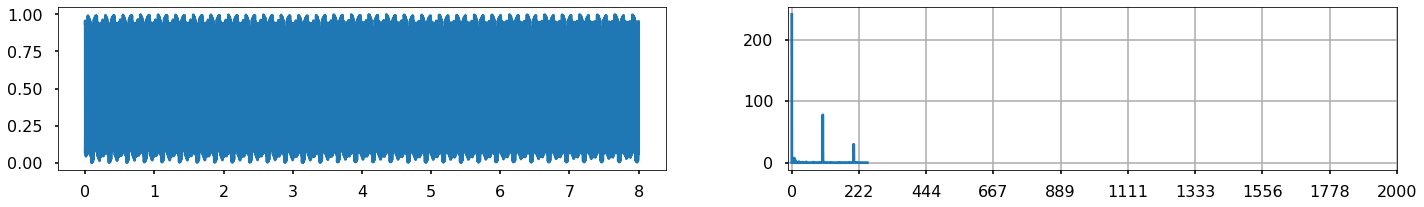

In [28]:
# Number of sample points
N = np.shape(volt_df)[0]
#fs = 1e6
fs = 2**16
# sample spacing
T = 1.0 / fs
y = volt_norm[0:M].reshape(-1,)

x = np.linspace(0.0, N*T, N, endpoint=False)
y = volt_norm.reshape(-1,)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(24,3))

plt.subplot(1,2,1)
plt.plot (x,y)

plt.subplot(1,2,2)
L1, L2 = 0, 2000
plt.plot(xf[L1:L2], 2.0/(L2-L1) * np.abs(yf[L1:L2]))
plt.xticks( np.linspace(L1, L2, 10) )
#plt.yscale('log')
plt.grid()

## Check Frequency of the signal

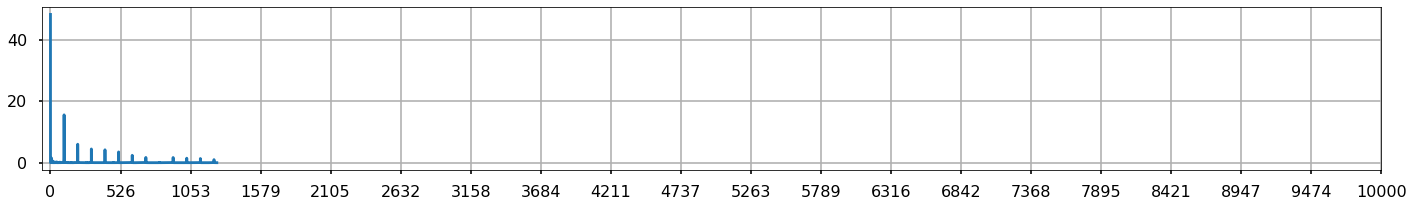

In [29]:
plt.figure(figsize=(24,3))
L1, L2 = 0, 10000
plt.plot(xf[L1:L2], 2.0/(L2-L1) * np.abs(yf[L1:L2]))
plt.xticks( np.linspace(L1, L2, 20) )
#plt.yscale('log')
plt.grid()

In [ ]:
from scipy.signal import savgol_filter
X = volt_norm.reshape(-1,)
filter_VLC = savgol_filter(X, window_length = 511, polyorder =1)
filter_VLC = savgol_filter(filter_VLC, window_length = 1821, polyorder =3) #1511

bwrVLC =  X - filter_VLC

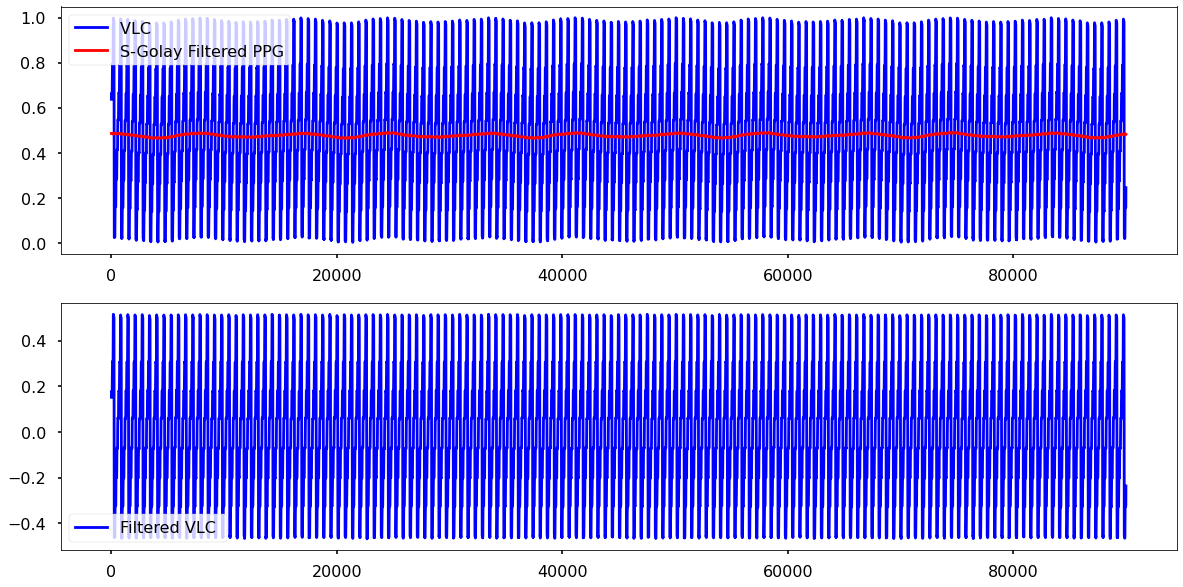

In [ ]:


plt.subplots(2, 1, figsize=(20,10))
L1, L2 = 10000, 100000
#L1, L2 = 0, len(bwrPPG1)
#plt.subplot(3, 1, 1)
plt.subplot(2, 1, 1)
plt.plot(X[L1:L2], "b-", label="VLC " )
plt.plot(filter_VLC[L1:L2], "r-", label="S-Golay Filtered PPG")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(bwrVLC[L1:L2], "b-", label="Filtered VLC " )
plt.legend()

### Remove the baseline

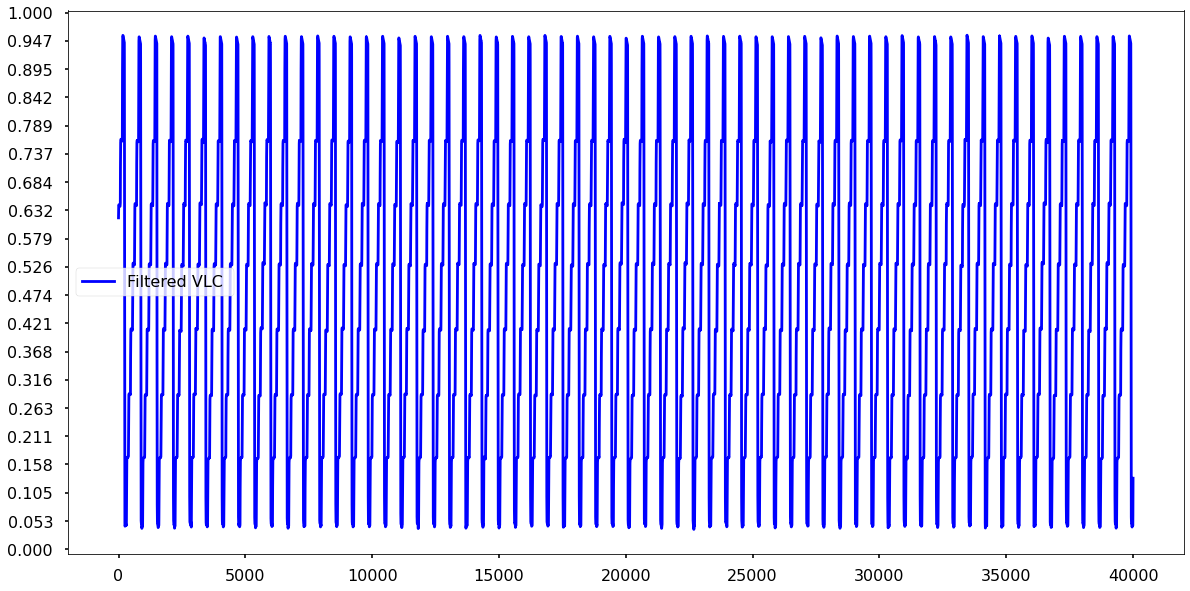

In [ ]:
bwrVLC_norm = scaler.fit_transform(np.array(bwrVLC).reshape(-1,1))

plt.figure( figsize=(20,10))
L1, L2 = 10000, 50000
plt.plot(bwrVLC_norm[L1:L2], "b-", label="Filtered VLC " )
plt.yticks( np.linspace(0, 1, 20) ) 
plt.legend()

(array([121481., 134215., 136706., 131207., 129606., 130636., 133782.,
        130942.]),
 array([0.   , 0.105, 0.215, 0.36 , 0.474, 0.579, 0.684, 0.83 , 1.   ]),
 <a list of 8 Patch objects>)

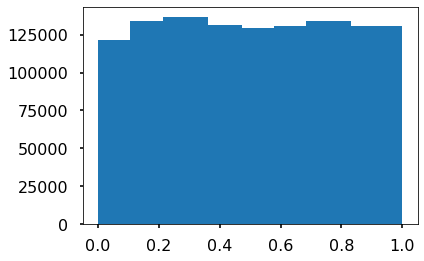

In [ ]:
plt.hist(volt_norm, bins=[0 , 0.105, 0.215 , 0.36, 0.474  , 0.579, 0.684 , 0.83, 1])

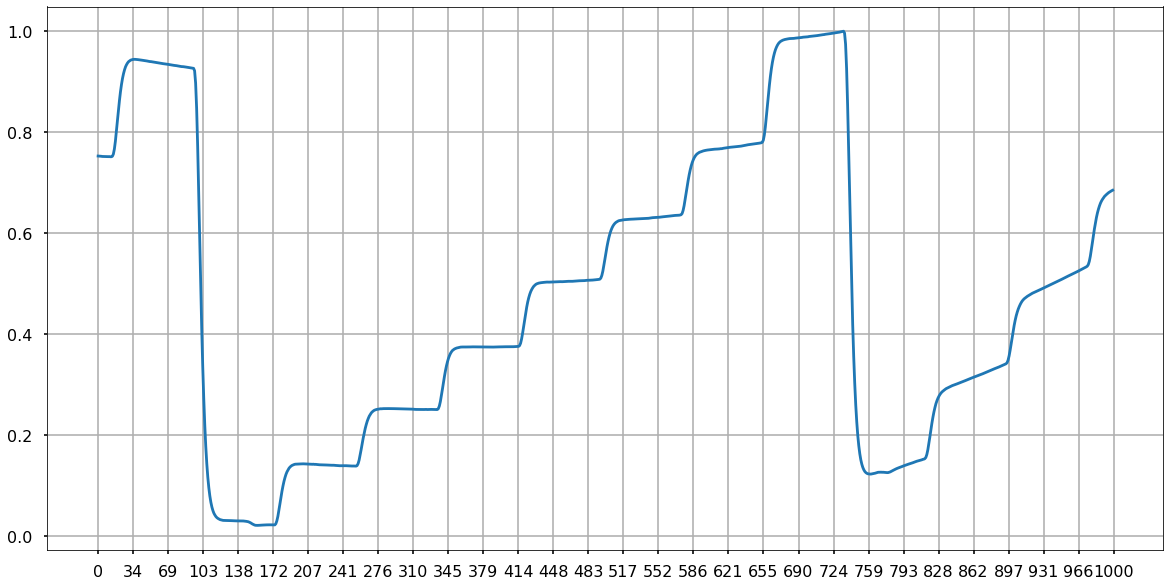

In [ ]:
plt.figure(figsize=(20,10))
L1, L2 = 1048575 - 1000, 1048575
plt.plot(bwrVLC_norm[L1:L2])
plt.xticks( np.linspace(0, L2-L1, 30) )
plt.grid()

In [ ]:
def segment_data(signal, distance, overlap):
  # distance: the window length in samples
  # the overlap of each segment in samples
  i = 1;
  s = list()
  while int(i+distance)<len(signal):
    a = signal[int(i):int(i+distance)];
    #a = [x for x in t]
    #a = DataFrame.transpose(DataFrame(t))
    #a = np.split(a,int(distance-1)
    s.append(a)
    i = i + distance - overlap
    
  return np.asarray(s) # return a nd array

In [ ]:
s = segment_data(bwrVLC_norm[1280:-240], 80, 0)

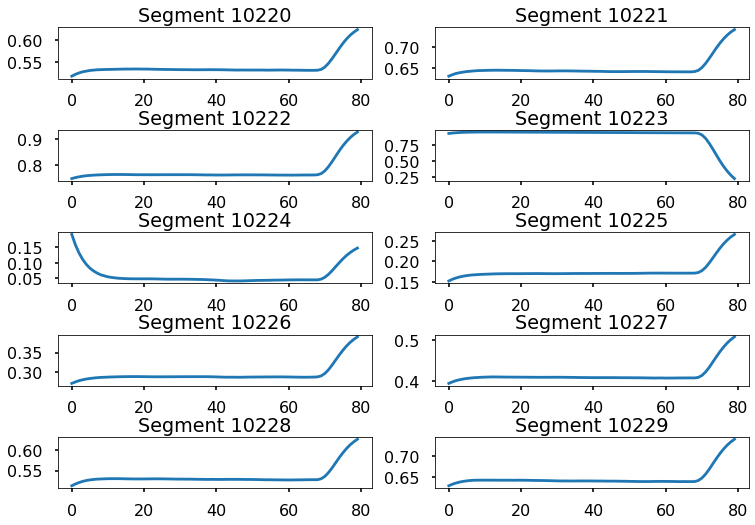

In [ ]:
plt.subplots(5,2, figsize=(12,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=1)
k = 10220
for i in range(k,10+k):
  plt.subplot(5,2,i-k+1)
  plt.plot(s[i])
  plt.title(f'Segment {i}')